#Spam Mail Detection


Problem Understanding

The dataset contains two columns:

label: ham (not spam) or spam.

text: The content of the SMS text.

Goal is to classify text into spam or ham using machine learning.

1.Import Necessary Libraries

In [ ]:
# Data handling
import pandas as pd
import numpy as np

# Text processing
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Feature extraction
from sklearn.feature_extraction.text import TfidfVectorizer

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Handling imbalance
from imblearn.over_sampling import SMOTE

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud


2. Load the Dataset

In [ ]:
# Load the dataset
data = pd.read_csv("/content/spam.csv", encoding='latin-1')

In [ ]:
# Print the first 5 rows to understand the dataset structure
print(data.head())

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [ ]:
# Display the number of rows and columns
print(data.shape)

(5572, 5)


In [ ]:
# Display information about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB
None


In [ ]:
# Print column names to verify their exact names
print(data.columns)

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')


3. Cleaning the Dataset

Remove unnecessary columns.

Rename columns for clarity (label, text).

Encode labels:
Assign 0 for ham and 1 for spam.

Check for and handle missing values if present.

In [ ]:
# Drop unnecessary columns
data = data.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)

In [ ]:
# Rename columns for clarity
data.columns = ["label", "text"]

In [ ]:

# Convert labels to numeric (0 = Ham, 1 = Spam)
data["label"] = data["label"].map({"ham": 0, "spam": 1})

In [ ]:
# Display the cleaned data
print(data.head())

   label                                               text
0      0  Go until jurong point, crazy.. Available only ...
1      0                      Ok lar... Joking wif u oni...
2      1  Free entry in 2 a wkly comp to win FA Cup fina...
3      0  U dun say so early hor... U c already then say...
4      0  Nah I don't think he goes to usf, he lives aro...


4. Exploratory Data Analysis (EDA)

Distribution of Labels

<ipython-input-17-6cb45bd6614c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=data, palette='Set2')


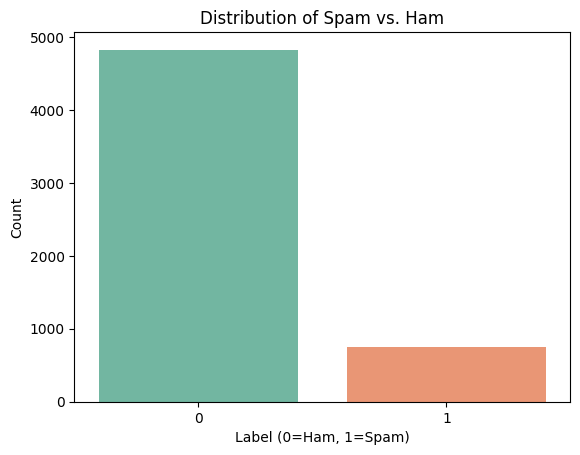

In [ ]:
# Visualize the distribution of spam vs. ham
sns.countplot(x='label', data=data, palette='Set2')
plt.title('Distribution of Spam vs. Ham')
plt.xlabel('Label (0=Ham, 1=Spam)')
plt.ylabel('Count')
plt.show()

A count plot shows the distribution of spam (1) and ham (0) messages to identify any imbalance.

Word Count Analysis

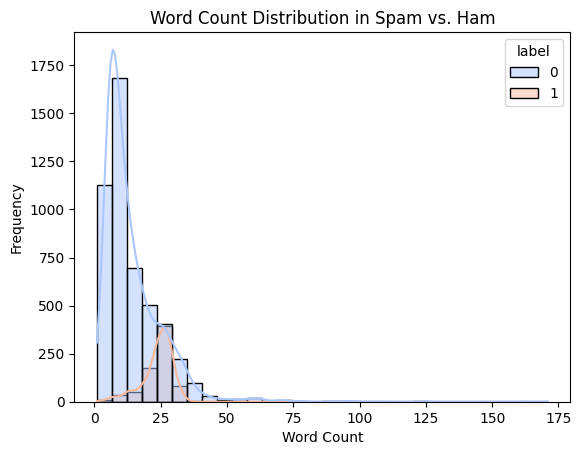

In [ ]:
# Add a word count column
data['word_count'] = data['text'].apply(lambda x: len(x.split()))

# Plot word count distribution
sns.histplot(data=data, x='word_count', hue='label', kde=True, bins=30, palette='coolwarm')
plt.title('Word Count Distribution in Spam vs. Ham')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()


Word Cloud for Spam Messages

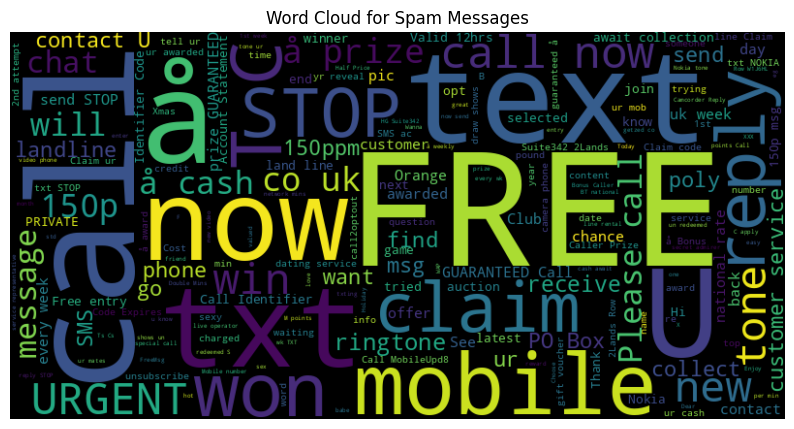

In [ ]:
from wordcloud import WordCloud

# Generate a word cloud for spam messages
spam_words = ' '.join(data[data['label'] == 1]['text'])
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(spam_words)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Spam Messages')
plt.show()


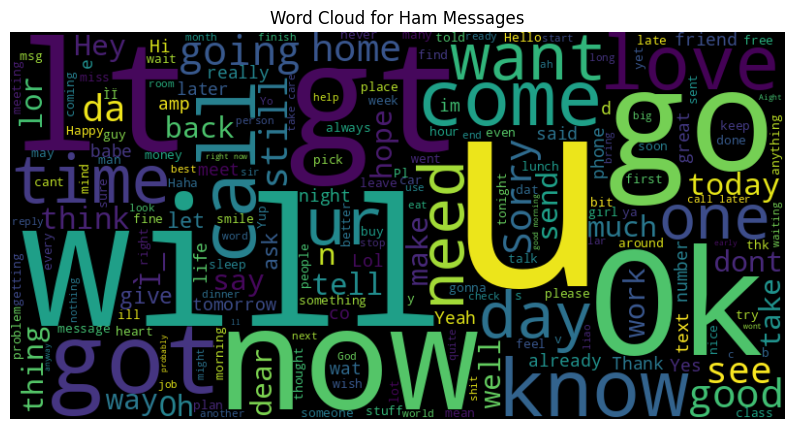

In [ ]:
# Generate a word cloud for ham messages
ham_words = ' '.join(data[data['label'] == 0]['text'])
wordcloud_ham = WordCloud(width=800, height=400, background_color='black').generate(ham_words)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_ham, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Ham Messages')
plt.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


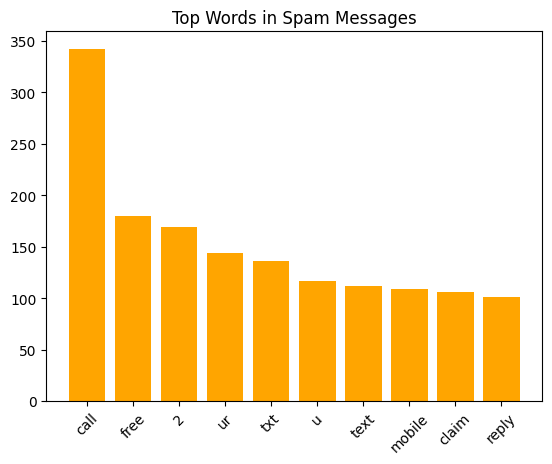

In [ ]:
import nltk
nltk.download('stopwords')

from collections import Counter
from nltk.corpus import stopwords

# Get top words
stop_words = set(stopwords.words('english'))
spam_words = ' '.join(data[data['label'] == 1]['text']).lower().split()
spam_words = [word for word in spam_words if word not in stop_words]

top_spam_words = Counter(spam_words).most_common(10)
words, counts = zip(*top_spam_words)

plt.bar(words, counts, color='orange')
plt.title('Top Words in Spam Messages')
plt.xticks(rotation=45)
plt.show()

5. Text Preprocessing

In [ ]:
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

# Download NLTK resources
nltk.download("stopwords")
nltk.download("wordnet")

# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Define text cleaning function
def clean_text(text):
    # Remove punctuation and lowercase the text
    text = re.sub(f"[{string.punctuation}]", "", text.lower())
    # Remove stopwords and lemmatize words
    return " ".join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words])

# Apply text cleaning
data['cleaned_text'] = data['text'].apply(clean_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


6. Feature Extraction and Train-Test Split

Use TF-IDF (Term Frequency-Inverse Document Frequency) to convert text data into numerical features.

Limit the number of features (e.g., max_features=3000) to reduce dimensionality.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Vectorize cleaned text using TF-IDF
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(data['cleaned_text']).toarray()
y = data['label']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


7. Handling Class Imbalance Using SMOTE

Use techniques like SMOTE (Synthetic Minority Oversampling Technique) to balance the dataset.
Ensure resampled training data has equal distribution of spam and ham messages.

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Display class distribution before and after resampling
print(f"Original class distribution: {Counter(y_train)}")
print(f"Resampled class distribution: {Counter(y_train_resampled)}")


Original class distribution: Counter({0: 3860, 1: 597})
Resampled class distribution: Counter({0: 3860, 1: 3860})


8. Model Training and Evaluation

Naive Bayes Model

In [ ]:
# Train a Naive Bayes classifier
nb_model = MultinomialNB()
nb_model.fit(X_train_resampled, y_train_resampled)

MultinomialNB()

In [ ]:
# Make predictions
nb_pred = nb_model.predict(X_test)

In [ ]:
# Evaluate the model
print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_pred))
print(classification_report(y_test, nb_pred, target_names=['Ham', 'Spam']))

Naive Bayes Accuracy: 0.9614349775784753
              precision    recall  f1-score   support

         Ham       0.99      0.97      0.98       965
        Spam       0.82      0.91      0.86       150

    accuracy                           0.96      1115
   macro avg       0.90      0.94      0.92      1115
weighted avg       0.96      0.96      0.96      1115



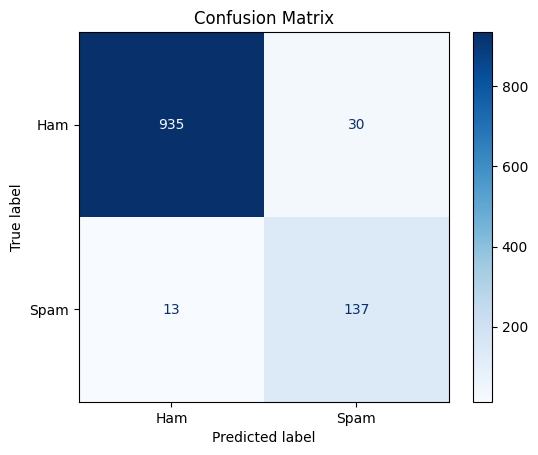

In [ ]:
# Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, nb_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Ham', 'Spam'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

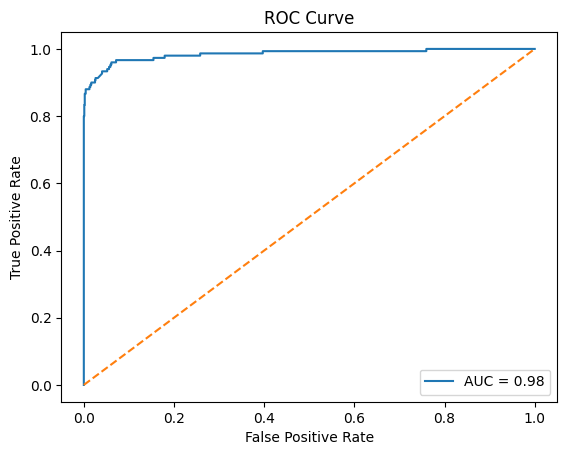

In [ ]:
#ROC-AUC Curve
from sklearn.metrics import roc_curve, roc_auc_score

# Predict probabilities for ROC
y_pred_prob = nb_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_pred_prob):.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


Predict with Unknown Data

In [ ]:
# Example new message (unknown data)
new_message = ["Congratulations! You've won a $1000 gift card. Click here to claim it."]

# Clean the new message (use the same cleaning function as before)
new_message_cleaned = [clean_text(msg) for msg in new_message]

# Transform the new message using the TF-IDF vectorizer
new_message_tfidf = tfidf.transform(new_message_cleaned).toarray()

# Predict the label (0 = Ham, 1 = Spam) for the new message
prediction = nb_model.predict(new_message_tfidf)

# Print the result
if prediction == 1:
    print("The message is Spam.")
else:
    print("The message is Ham.")


The message is Spam.
